In [1]:
# prior probabilities

import numpy as np
from sklearn.datasets import fetch_openml
from collections import Counter

# Step 1: Load the MNIST dataset
print("Fetching MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

y = y.astype(int)  # Convert labels to integers

# Step 2: Calculate the total number of samples
total_samples = len(y)

# Step 3: Count the number of samples for each class
class_counts = Counter(y)

# Step 4: Calculate the class prior probabilities P(C_k)
class_priors = {class_label: count / total_samples for class_label, count in class_counts.items()}

# Step 5: Display the class prior probabilities
print("Class Prior Probabilities:")
for class_label, prior in class_priors.items():
    print(f"P(C_{class_label}) = {prior:.4f}")


Fetching MNIST dataset...
Class Prior Probabilities:
P(C_5) = 0.0902
P(C_0) = 0.0986
P(C_4) = 0.0975
P(C_1) = 0.1125
P(C_9) = 0.0994
P(C_2) = 0.0999
P(C_3) = 0.1020
P(C_6) = 0.0982
P(C_7) = 0.1042
P(C_8) = 0.0975


In [3]:
import numpy as np
from sklearn.datasets import fetch_openml

# Step 1: Fetch the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)  # Ensure labels are integers

# Step 2: Standardize the data
X = X / 255.0  # Normalize the pixel values to the range [0, 1]

# Step 3: Define a function to calculate alpha and beta for Beta distribution
def compute_alpha_beta(X_class):
    # For each feature (pixel) in the dataset, compute the mean and variance
    alpha = []
    beta = []
    
    # Compute alpha and beta for each feature (pixel) for the given class
    for i in range(X_class.shape[1]):  # Loop over all features (784 features for MNIST)
        feature_data = X_class[:, i]  # Data for the ith feature (pixel)
        
        # Compute the mean and variance for this feature
        mean = np.mean(feature_data)
        variance = np.var(feature_data)
        
        # Avoid division by zero by checking if variance is zero
        if variance == 0:
            alpha_i = 1.0
            beta_i = 1.0
        else:
            # Use the method of moments to estimate alpha and beta
            k = mean * (1 - mean) / variance
            alpha_i = mean * k
            beta_i = (1 - mean) * k
        
        alpha.append(alpha_i)
        beta.append(beta_i)
    
    return np.array(alpha), np.array(beta)


class_label = 0
class_data = X[y == class_label]

# Compute alpha and beta for the current class
alpha, beta = compute_alpha_beta(class_data)

# Print the results for class '0'
print(f"Alpha for class 0 (first 10 values): {alpha[:10]}")  # First 10 values of alpha
print(f"Beta for class 0 (first 10 values): {beta[:10]}")    # First 10 values of beta




Alpha for class 0 (first 10 values): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Beta for class 0 (first 10 values): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


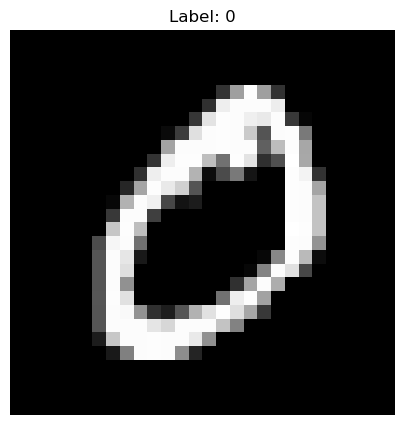

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

# Step 1: Fetch the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)  # Ensure labels are integers

# Step 2: Normalize the data
X = X / 255.0  # Scale pixel values to [0, 1]

# Step 3: Reshape and visualize
# Pick a random image from the dataset
sample_index = 1  # You can change this index to view different images
image = X[sample_index].reshape(28, 28)  # Reshape the flat array into 28x28
label = y[sample_index]

# Plot the image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


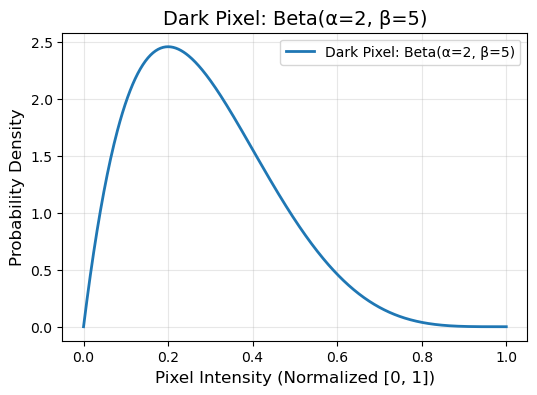

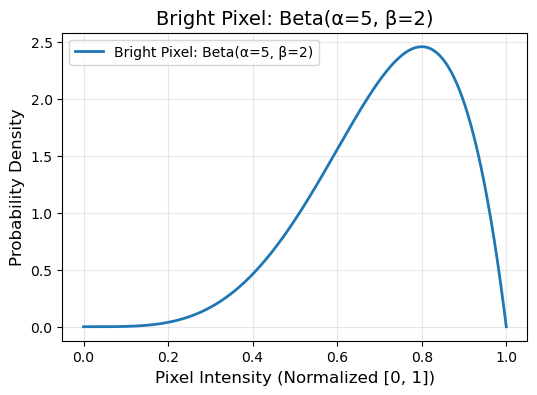

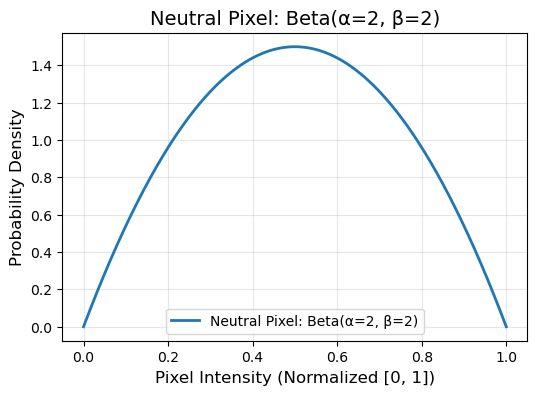

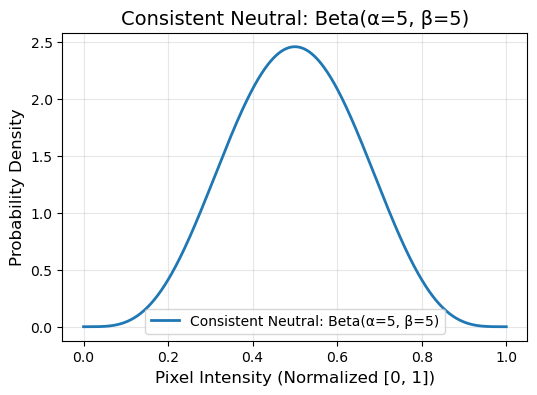

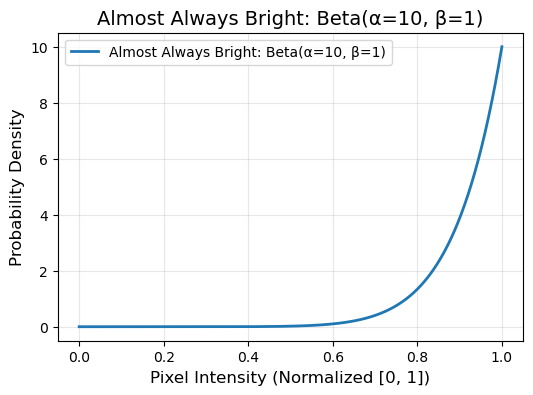

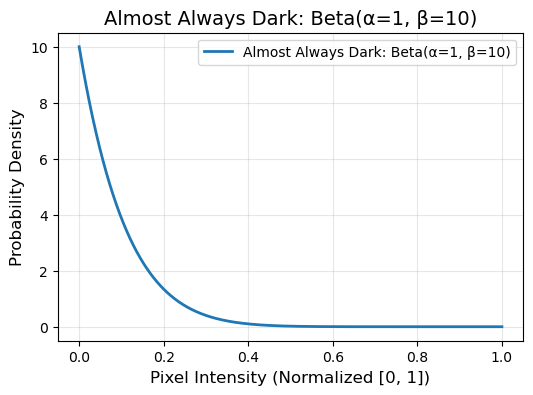

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define alpha and beta values to illustrate the effect on the Beta distribution
examples = [
    (2, 5, "Dark Pixel: Beta(α=2, β=5)"),
    (5, 2, "Bright Pixel: Beta(α=5, β=2)"),
    (2, 2, "Neutral Pixel: Beta(α=2, β=2)"),
    (5, 5, "Consistent Neutral: Beta(α=5, β=5)"),
    (10, 1, "Almost Always Bright: Beta(α=10, β=1)"),
    (1, 10, "Almost Always Dark: Beta(α=1, β=10)")
]

x = np.linspace(0, 1, 500)  # Pixel intensity range [0, 1]

# Plot each distribution separately
for alpha, beta_val, label in examples:
    plt.figure(figsize=(6, 4))
    y = beta.pdf(x, alpha, beta_val)
    plt.plot(x, y, label=label, lw=2)
    plt.title(label, fontsize=14)
    plt.xlabel("Pixel Intensity (Normalized [0, 1])", fontsize=12)
    plt.ylabel("Probability Density", fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)
    plt.show()
